In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

In [2]:
file_path = "../Data/cleaned_blood_type_distribution_by_country.csv"
df = pd.read_csv(file_path)

df.head()

,Country/Dependency,Population,O+,A+,B+,AB+,O-,A-,B-,AB-
0,Albania,"3,074,579",34.10%,31.20%,14.50%,5.20%,6.00%,5.50%,2.60%,0.90%
1,Algeria,"43,576,691",40.00%,30.00%,15.00%,4.25%,6.60%,2.30%,1.10%,0.75%
2,Argentina,"45,479,118",50.34%,31.09%,8.20%,2.16%,4.29%,2.98%,0.74%,0.20%
3,Armenia,"3,021,324",29.00%,46.30%,12.00%,5.60%,2.00%,3.70%,1.00%,0.40%
4,Australia,"25,466,459",38.00%,32.00%,12.00%,4.00%,7.00%,6.00%,2.00%,1.00%


In [3]:
df.columns = df.columns.str.strip().str.replace(' ', '_')
df.rename(columns = {'Country/Dependency':'Country'}, inplace = True)
df.head()

,Country,Population,O+,A+,B+,AB+,O-,A-,B-,AB-
0,Albania,"3,074,579",34.10%,31.20%,14.50%,5.20%,6.00%,5.50%,2.60%,0.90%
1,Algeria,"43,576,691",40.00%,30.00%,15.00%,4.25%,6.60%,2.30%,1.10%,0.75%
2,Argentina,"45,479,118",50.34%,31.09%,8.20%,2.16%,4.29%,2.98%,0.74%,0.20%
3,Armenia,"3,021,324",29.00%,46.30%,12.00%,5.60%,2.00%,3.70%,1.00%,0.40%
4,Australia,"25,466,459",38.00%,32.00%,12.00%,4.00%,7.00%,6.00%,2.00%,1.00%


In [4]:
df['Population'] = df['Population'].str.replace(',', '').astype(float)
df.head()

,Country,Population,O+,A+,B+,AB+,O-,A-,B-,AB-
0,Albania,3074579.0,34.10%,31.20%,14.50%,5.20%,6.00%,5.50%,2.60%,0.90%
1,Algeria,43576691.0,40.00%,30.00%,15.00%,4.25%,6.60%,2.30%,1.10%,0.75%
2,Argentina,45479118.0,50.34%,31.09%,8.20%,2.16%,4.29%,2.98%,0.74%,0.20%
3,Armenia,3021324.0,29.00%,46.30%,12.00%,5.60%,2.00%,3.70%,1.00%,0.40%
4,Australia,25466459.0,38.00%,32.00%,12.00%,4.00%,7.00%,6.00%,2.00%,1.00%


In [5]:
blood_groups = ['A+', 'A-', 'B+', 'B-', 'AB+', 'AB-', 'O+', 'O-']

for col in blood_groups:
    df[col] = df[col].str.replace('%', '').astype(float)
    
df.head()

,Country,Population,O+,A+,B+,AB+,O-,A-,B-,AB-
0,Albania,3074579.0,34.10,31.20,14.5,5.20,6.00,5.50,2.60,0.90
1,Algeria,43576691.0,40.00,30.00,15.0,4.25,6.60,2.30,1.10,0.75
2,Argentina,45479118.0,50.34,31.09,8.2,2.16,4.29,2.98,0.74,0.20
3,Armenia,3021324.0,29.00,46.30,12.0,5.60,2.00,3.70,1.00,0.40
4,Australia,25466459.0,38.00,32.00,12.0,4.00,7.00,6.00,2.00,1.00


In [6]:
print(df.isnull().sum())

Country       0
Population    0
O+            0
A+            0
B+            0
AB+           1
O-            1
A-            1
B-            1
AB-           1
dtype: int64


In [7]:
df.fillna(0, inplace = True)

In [8]:
df.to_csv("../Data/processed_blood_type_data.csv", index = False)

# Data Analysis

In [9]:
df = pd.read_csv("../Data/processed_blood_type_data.csv")
df.head()

,Country,Population,O+,A+,B+,AB+,O-,A-,B-,AB-
0,Albania,3074579.0,34.10,31.20,14.5,5.20,6.00,5.50,2.60,0.90
1,Algeria,43576691.0,40.00,30.00,15.0,4.25,6.60,2.30,1.10,0.75
2,Argentina,45479118.0,50.34,31.09,8.2,2.16,4.29,2.98,0.74,0.20
3,Armenia,3021324.0,29.00,46.30,12.0,5.60,2.00,3.70,1.00,0.40
4,Australia,25466459.0,38.00,32.00,12.0,4.00,7.00,6.00,2.00,1.00


In [10]:
df.describe()

,Population,O+,A+,B+,AB+,O-,A-,B-,AB-
count,1.260000e+02,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,1.191611e+08,40.315000,29.242937,16.177857,4.575873,4.261270,3.365000,1.351667,0.457540
std,7.095497e+08,9.903148,6.525914,7.565480,2.297524,2.998154,2.556899,0.865503,0.378155
min,3.913700e+04,27.000000,14.000000,4.720000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.495125e+06,32.655000,24.362500,9.700000,2.510000,1.850000,1.000000,0.602500,0.100000
50%,1.231104e+07,38.000000,30.000000,15.000000,4.200000,4.295000,2.760000,1.300000,0.400000
75%,4.528737e+07,46.775000,34.000000,21.045000,6.210000,6.000000,6.000000,2.000000,0.875000
max,7.772851e+09,75.000000,46.300000,36.800000,11.320000,14.100000,8.100000,3.130000,1.200000


In [11]:
print(df.isnull().sum())    

Country       0
Population    0
O+            0
A+            0
B+            0
AB+           0
O-            0
A-            0
B-            0
AB-           0
dtype: int64


# Visualization

In [12]:
avg_blood_distribution = df[['A+', 'A-', 'B+', 'B-', 'AB+', 'AB-', 'O+', 'O-']].mean()

fig = px.pie(
    values = avg_blood_distribution.values,
    names = avg_blood_distribution.index,
    title = 'Global Blood Type Distribution'
)
fig.show()

In [20]:
df_sorted = df.sort_values(by = 'Population', ascending = False)

for col in blood_groups:
    df_sorted[col] = (df_sorted[col] / 100) * df_sorted['Population']
fig = px.bar(
    df_sorted.head(20),  # Show only the top 20 countries
    x="Country",
    y=["O+", "A+", "B+", "AB+", "O-", "A-", "B-", "AB-"],
    title="Top 20 Countries - Blood Group Distribution (By Population)",
    barmode="group",
    opacity=0.8  # Make bars more visible
)

fig.update_layout(
    xaxis_tickangle=-45,
    height=700,
    width=1200,
    yaxis_type="log",
    margin=dict(l=20, r=20, t=40, b=20),
    bargap=0.35
)
fig.update_traces(marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)

fig.show()


In [24]:
fig = px.choropleth(
    df,
    locations="Country",
    locationmode="country names",
    color="O+",
    hover_data = ["A+", "B+", "AB+", "O-", "A-", "B-", "AB-"],
    title="Blood Type O+ Distribution Across the World"
)

fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    margin=dict(l=0, r=0, t=50, b=0)
)

fig.show()

# Converting the countries to continents 

In [27]:
import pycountry_convert as pc

def get_continent(country_name):
    try:
        country_code = pc.country_name_to_country_alpha2(country_name)
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        continent_map = {
            "AF": "Africa",
            "AS": "Asia",
            "EU": "Europe",
            "NA": "North America",
            "SA": "South America",
            "OC": "Oceania",
        }
        return continent_map.get(continent_code, "Unknown")
    except:
        return "Unknown"

df["Continent"] = df["Country"].apply(get_continent)

print(df["Continent"].value_counts())


Continent
Europe           39
Asia             38
Africa           23
North America    10
South America     9
Oceania           4
Unknown           3
Name: count, dtype: int64


In [31]:
# Group by Continent
df_continent = df.groupby("Continent")[blood_groups].mean().reset_index()

# Stacked Bar Chart
fig = px.bar(
    df_continent,
    x="Continent",
    y=blood_groups,
    title="Average Blood Type Distribution by Continent",
    barmode="stack"
)

fig.update_layout(
    xaxis_tickangle=-45,
    height=600,
    width=1000
)

fig.show()

In [32]:
# Find the rarest blood type for each country
df["Rarest_Blood_Type"] = df[["O+", "A+", "B+", "AB+", "O-", "A-", "B-", "AB-"]].idxmin(axis=1)

# Count occurrences of rarest blood types
rare_blood_counts = df["Rarest_Blood_Type"].value_counts()

# Bar chart of rarest blood types worldwide
fig = px.bar(
    x=rare_blood_counts.index,
    y=rare_blood_counts.values,
    title="Rarest Blood Type Distribution Across Countries",
    labels={"x": "Blood Type", "y": "Number of Countries"}
)

fig.show()


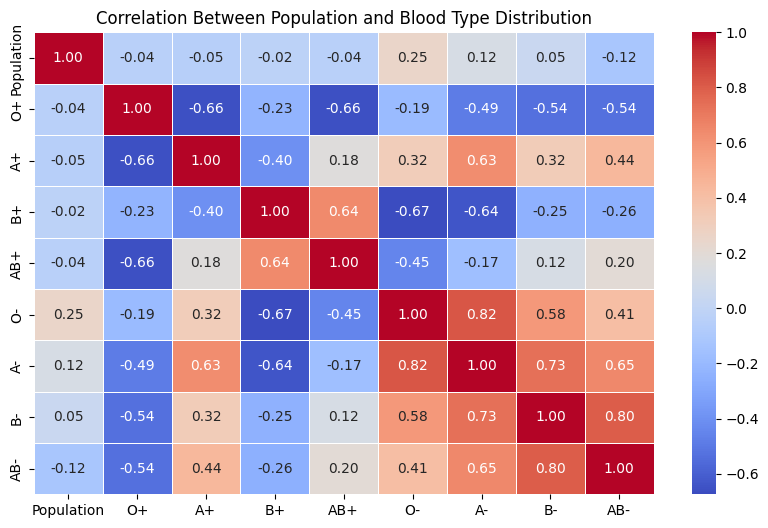

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert Population to numeric if not already
df["Population"] = df["Population"].astype(float)

# Correlation matrix
correlation_matrix = df[["Population", "O+", "A+", "B+", "AB+", "O-", "A-", "B-", "AB-"]].corr()

# Heatmap of Correlation
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Population and Blood Type Distribution")
plt.show()
